IMPORTING THE IMPORTANT FILES!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/MY_FINAL PROJECT/Train_customer.csv")

OVER VIEWING THE DATA

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9125 non-null   int64  
 1   Gender           9125 non-null   object 
 2   Ever_Married     8970 non-null   object 
 3   Age              9125 non-null   int64  
 4   Graduated        9041 non-null   object 
 5   Profession       8982 non-null   object 
 6   Work_Experience  8170 non-null   float64
 7   Spending_Score   9125 non-null   object 
 8   Family_Size      8733 non-null   float64
 9   Var_1            9034 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 713.0+ KB


In [5]:
df.nunique()

ID                 8191
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       155
Age                  0
Graduated           84
Profession         143
Work_Experience    955
Spending_Score       0
Family_Size        392
Var_1               91
dtype: int64

SINCE THERE ARE MANY MISSING VALUES IN THE WE HAVE TO FILL THE MISSING VALUES USING Mode.

In [7]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [8]:
df['Graduated']= df['Graduated'].fillna(df['Graduated'].mode()[0])

In [9]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [10]:
df['Work_Experience']= df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])

In [11]:
df['Family_Size']= df['Family_Size'].fillna(df['Family_Size'].mode()[0])

In [12]:
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])

In [13]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


Univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

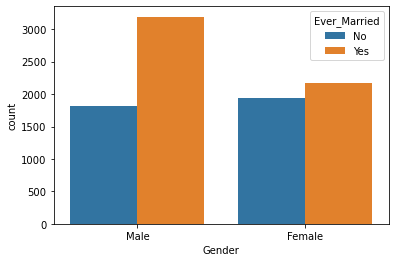

In [14]:
sns.countplot(df['Gender'], hue = df['Ever_Married'])

<AxesSubplot:xlabel='Profession', ylabel='count'>

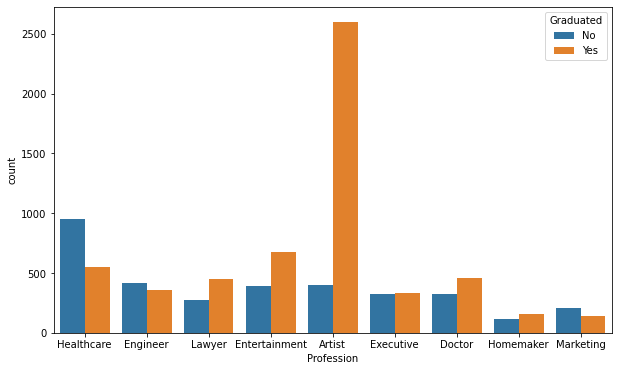

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(df['Profession'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

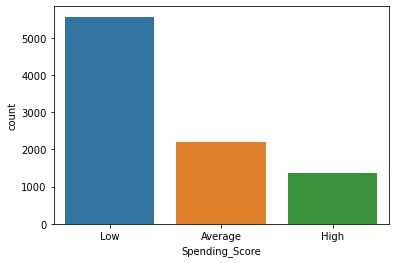

In [16]:
sns.countplot(df['Spending_Score'])

([<matplotlib.patches.Wedge at 0x21bf7d40d30>,
 [Text(0.5645839697243482, 0.9440577001064588, 'Artist'),
  Text(-0.9310870063916925, 0.5857277409586783, 'Healthcare'),
  Text(-1.0428970783677989, -0.34980806727677033, 'Entertainment'),
  Text(-0.6281995933855521, -0.9029757864252104, 'Doctor'),
  Text(-0.07964933436068376, -1.097112566483449, 'Engineer'),
  Text(0.47109669653359576, -0.9940160474132866, 'Lawyer'),
  Text(0.8747688914829076, -0.6669178258929396, 'Executive'),
  Text(1.0488780365903008, -0.33144360660371186, 'Marketing'),
  Text(1.0951803225494816, -0.1028594239747319, 'Homemaker')],
 [Text(0.30795489257691716, 0.514940563694432, '32.84%'),
  Text(-0.507865639850014, 0.3194878587047336, '16.44%'),
  Text(-0.5688529518369811, -0.19080440033278379, '11.74%'),
  Text(-0.34265432366484655, -0.4925322471410237, '8.61%'),
  Text(-0.04344509146946386, -0.5984250362636994, '8.43%'),
  Text(0.25696183447287035, -0.5421905713163381, '7.97%'),
  Text(0.4771466680815859, -0.36377335

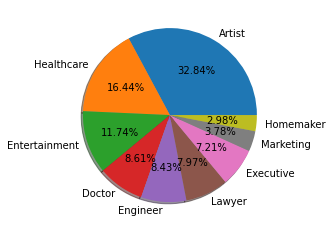

In [17]:
label = df['Profession'].value_counts().index
value = df['Profession'].value_counts().values
plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=None)

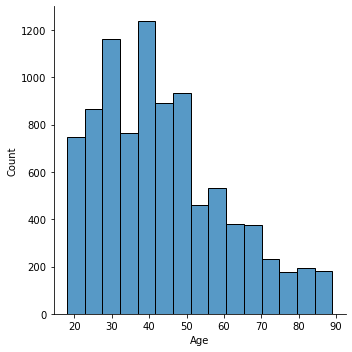

In [18]:
sns.displot(df['Age'], bins = 15)

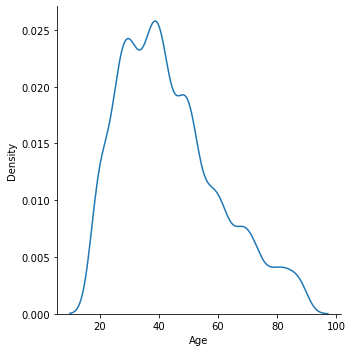

In [19]:
sns.displot(df['Age'], kind ='kde')

<AxesSubplot:xlabel='Age'>

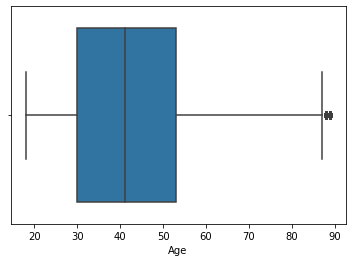

In [20]:
sns.boxplot(df['Age'])

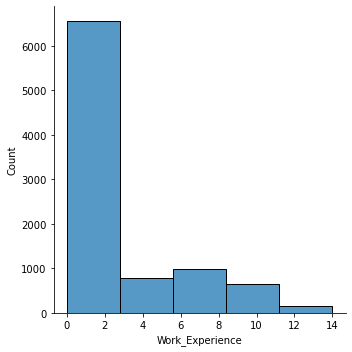

In [21]:
sns.displot(df['Work_Experience'], bins = 5)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

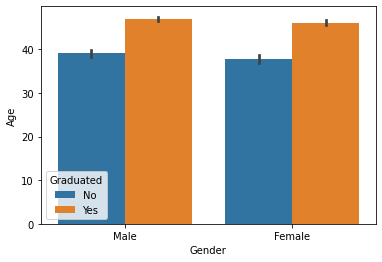

In [22]:
sns.barplot(x= df['Gender'], y = df['Age'], hue = df['Graduated'])

<AxesSubplot:xlabel='Gender', ylabel='Work_Experience'>

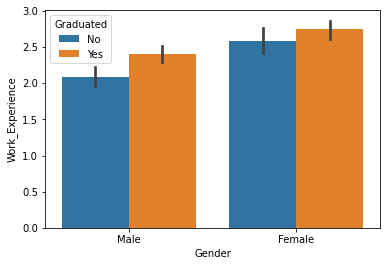

In [23]:
sns.barplot(x= df['Gender'], y = df['Work_Experience'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Family_Size'>

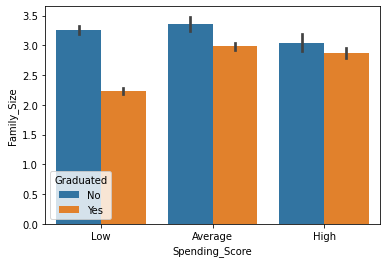

In [24]:
sns.barplot(x= df['Spending_Score'], y = df['Family_Size'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Work_Experience'>

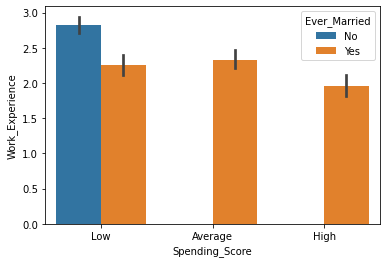

In [25]:
sns.barplot(x= df['Spending_Score'], y = df['Work_Experience'], hue = df['Ever_Married'])

In [26]:
df['Ever_Married']= df['Ever_Married'].replace({'No':0 , 'Yes':1})

In [27]:
df['Graduated']= df['Graduated'].replace({'No':0 , 'Yes':1})

In [28]:
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [29]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [30]:
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [31]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [32]:
df['Profession'].value_counts()

Artist           2997
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64

In [33]:
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [34]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [35]:
wcss = []
range_values = range(1,15)

In [36]:
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

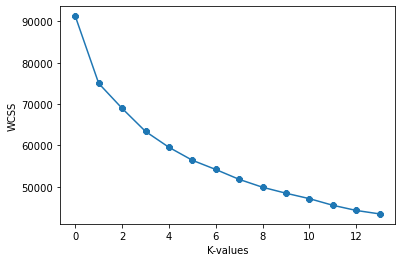

In [37]:
plt.plot(wcss, marker = '8')
plt.xlabel('K-values')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(4, random_state = 42).fit(df_scaled)

In [39]:
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(4, 10)

In [40]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,-0.109544,0.297940,-1.168370,-0.349564,0.579451,-0.217809,0.331455,-0.729699,-0.558483,0.186359
1,0.010853,-0.160600,0.821300,1.000997,-0.239345,1.198703,-0.168872,0.935692,-0.106079,0.164174
2,0.059675,-0.026905,-0.919481,-0.975463,-1.109082,0.010889,-0.072348,-0.656760,0.776957,-0.454176
3,0.022154,-0.067403,0.836593,0.237281,0.539445,-0.644444,-0.052512,0.304974,-0.103685,0.083660


In [41]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [42]:
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462873.885714,0.600000,0.013265,37.694898,0.907653,1.811224,3.545408,6.661338e-16,1.960714,5.415816
1,463189.056197,0.371801,0.992474,60.381335,0.511791,5.189162,1.913698,1.233317e+00,2.644757,5.384345
2,463316.860421,0.438337,0.135755,27.181166,0.091300,2.356597,2.228489,5.401530e-02,3.979924,4.507170
3,463218.639610,0.418182,1.000000,47.552597,0.888312,0.793831,2.293182,7.662338e-01,2.648377,5.270130


In [43]:
y_kmeans = kmeans.fit_predict(df_scaled)

In [44]:
df_cluster = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)
df_cluster.head(9)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,462809,0,0,22,0,1,1.0,0,4.0,4,2
1,462643,1,1,38,1,3,1.0,1,3.0,4,3
2,466315,1,1,67,1,3,1.0,0,1.0,6,3
3,461735,0,1,67,1,5,0.0,2,2.0,6,1
4,462669,1,1,40,1,2,1.0,2,6.0,6,3
5,461319,0,1,56,0,0,0.0,1,2.0,6,3
6,460156,0,0,32,1,1,1.0,0,3.0,6,0
7,464347,1,0,33,1,1,1.0,0,3.0,6,0
8,465015,1,1,61,1,3,0.0,0,3.0,7,3


In [45]:
pca = PCA(n_components = 2)

In [46]:
principal_comp = pca.fit_transform(df_scaled)

In [47]:
principal_comp

array([[-2.25102671,  1.174046  ],
       [ 0.62345801,  0.17902357],
       [ 1.36271693, -1.36802837],
       ...,
       [ 1.46865599,  0.72003943],
       [-2.39329899,  1.22353656],
       [-2.38351937,  1.59528654]])

In [48]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])

In [49]:
pca_df.head()

,pca1,pca2
0,-2.251027,1.174046
1,0.623458,0.179024
2,1.362717,-1.368028
3,2.894845,0.383413
4,1.214612,1.011953


In [50]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':labels})] ,axis=1)

In [51]:
pca_df.head()

,pca1,pca2,Cluster
0,-2.251027,1.174046,2
1,0.623458,0.179024,3
2,1.362717,-1.368028,3
3,2.894845,0.383413,1
4,1.214612,1.011953,3


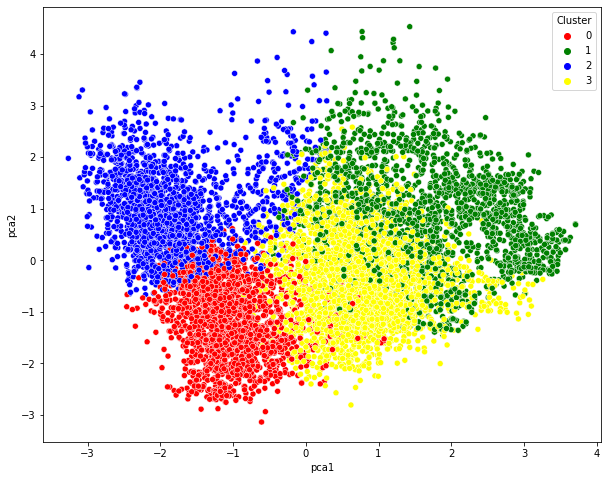

In [52]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df, palette = ['red','green','blue','yellow'])
plt.show()

In [53]:
df_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,462809,0,0,22,0,1,1.0,0,4.0,4,2
1,462643,1,1,38,1,3,1.0,1,3.0,4,3
2,466315,1,1,67,1,3,1.0,0,1.0,6,3
3,461735,0,1,67,1,5,0.0,2,2.0,6,1
4,462669,1,1,40,1,2,1.0,2,6.0,6,3


In [54]:
df_cluster['Gender'] = df_cluster['Gender'].replace({0:'Male', 1:'Female'})

In [55]:
df_cluster['Ever_Married'] = df_cluster['Ever_Married'].replace({0:'No', 1:'Yes'})

In [56]:
df_cluster['Graduated'] = df_cluster['Graduated'].replace({0:'No', 1:'Yes'})

In [57]:
df_cluster['Spending_Score'] = df_cluster['Spending_Score'].replace({0:'Low', 1:'Average', 2:'High'})

In [58]:
df_cluster['Profession'] = df_cluster['Profession'].replace({0:'Artist', 1:'Healthcare', 2:'Entertainment', 3:'Engineer',4:'Doctor', 5:'Lawyer', 6:'Executive', 7:'Marketing', 8:'Homemaker'})

In [59]:
df_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,4,2
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,4,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,6,3
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,6,1
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,6,3


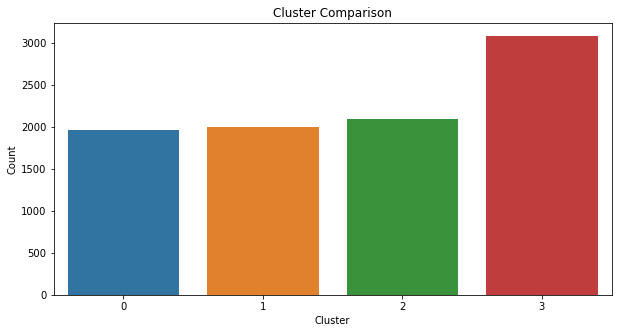

In [60]:
plt.subplots(figsize=(10,5))
sns.countplot(df_cluster['Cluster'].sort_values())
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Comparison')

plt.show()

In [61]:
gender_based = pd.pivot_table(df_cluster, values='Age', index=['Gender'], columns=['Cluster'], aggfunc=np.count_nonzero)

In [62]:
gender_based

Cluster,0,1,2,3
Gender,,,,
Female,1174,740,920,1288
Male,783,1252,1176,1792


No handles with labels found to put in legend.


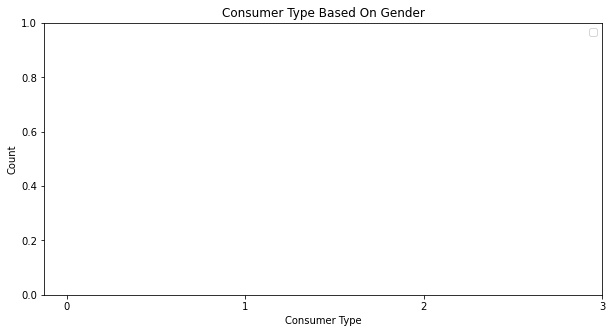

In [63]:
x = np.arange(len(gender_based.columns))
width = 0.25
for i in range(len(gender_based)):
    ax.bar(x + (i*width), gender_based.loc[gender_based.index[i]], width=width, label=gender_based.index[i])
fig,ax = plt.subplots(figsize = (10,5))
ax.set_xticks(x + ((len(gender_based)/2-0.5)*width))
ax.set_xticklabels(gender_based.columns)
plt.title('Consumer Type Based On Gender')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc = 'best', frameon=True)
plt.show()